<a href="https://colab.research.google.com/github/divyanash911/Rassen-Shuriken/blob/main/Rassen_Shuriken_SVM_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 26.9 MB/s eta 0:00:00


In [5]:
from google.colab import drive
from google.colab import files
import pandas as pd

drive.mount('/content/drive')
uploaded = files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving data.csv to data (1).csv


In [8]:
labels = []
for count in range(1,43):
    labels.append("x"+str(count))
    labels.append("y"+str(count))
    labels.append("z"+str(count))

labels.append("sign")

data = pd.read_csv('/content/data.csv', names = labels)

In [9]:
data.head(1)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x40,y40,z40,x41,y41,z41,x42,y42,z42,sign
0,0.786653,0.433558,-7.863991e-08,0.674585,0.455297,0.000024,0.549874,0.499391,-0.018078,0.456997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dog


dog


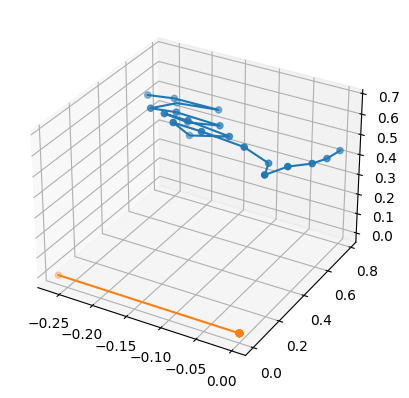

dog


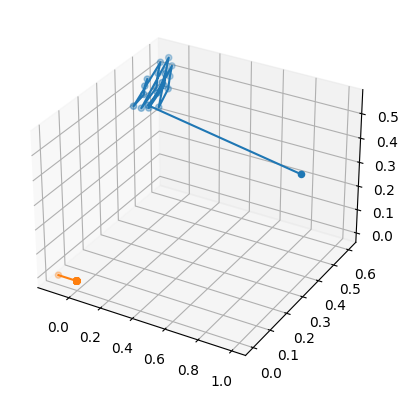

dog


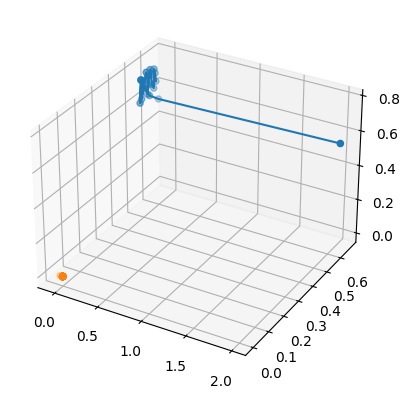

dog


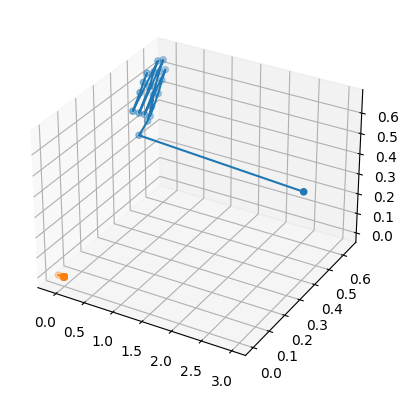

dog


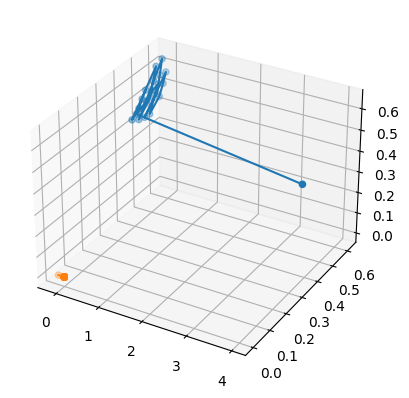

In [10]:
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_plot(data):

  for row in data.itertuples():
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        print(row.sign)
        left = row[:(len(row)//2 - 1)]
        x = left[::3]
        y = left[1::3]
        z = left[2::3]

        ax.scatter(x, y, z)
        ax.plot(x,y,z)

        right = row[(len(row)//2 - 1):]
        x = right[:-2:3]
        y = right[1:-2:3]
        z = right[2:-2:3]

        ax.scatter(x, y, z)
        ax.plot(x,y,z)
        plt.show()


draw_3d_plot(data.head(5))


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data.drop('sign', axis=1), data['sign'], test_size=0.2, random_state=0)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.9383561643835616


zero


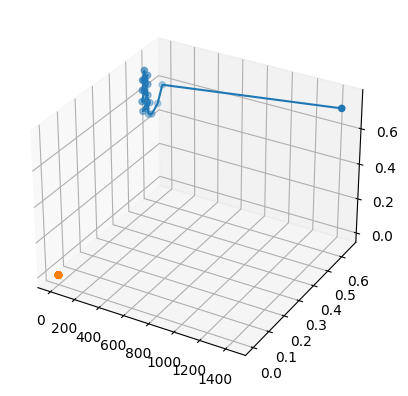

['zero']


In [19]:

random_data = data.sample(1)
draw_3d_plot(random_data)
print(svm_model.predict(random_data.drop('sign', axis=1)))
